In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('input-2019.png')
target = cv2.imread('output-2019.png')

In [3]:
h, w, c = img.shape
img_size = (h, w)

In [4]:
# 評価関数
def eval_score(rotation, zoom_rate):
    rot_matrix = cv2.getRotationMatrix2D((img_size[0]/2.0, img_size[1]/2.0), rotation, zoom_rate)
    img_transformed = cv2.warpAffine(img, rot_matrix, img_size, flags=cv2.INTER_NEAREST, borderValue=(255, 255, 255))
    score = -np.sum(np.abs(img_transformed - target), dtype='int64')
    return score

In [5]:
import math

# 焼きなまし法
rotation = 0.0 # 回転角度(の初期値)
zoom_rate = 1.0 # 拡大率(の初期値)

rotation_last = 0.0 # 前回の回転角度
rotation_best = 0.0 # 最良の回転角度
zoom_rate_last = 1.0 # 前回の回転角度
zoom_rate_best = 1.0 # 最良の回転角度

score = eval_score(rotation, zoom_rate) # 現在の評価値
score_last = score # 前回の評価値
score_best = score # 最良の評価値

rotation_sd = 0.1 # 回転角度の変化量を正規分布で決める際の標準偏差
zoom_rate_sd = 0.001 # 拡大率の変化量を正規分布で決める際の標準偏差

temperature = img_size[0] * img_size[1] * 255 # 温度(の初期値)
decay_rate = 0.0001 # 冷却率
iter_limit = 100000 # 最大繰り返し回数

history = [] # 評価値とその時点でのパラメータの履歴

# 以下、本体
for i in range(iter_limit):
    if i % 1000 == 0: print(f'i = {i}: rotation = {rotation:.8f}, zoom_rate = {zoom_rate:.8f}, score = {score}, temperature = {temperature:.6e}')
    history.append([rotation, zoom_rate, score, temperature])
    rotation_delta = np.random.normal(0.0, rotation_sd)
    zoom_rate_delta = np.random.normal(0.0, zoom_rate_sd)
    rotation = rotation + rotation_delta
    zoom_rate = zoom_rate + zoom_rate_delta
    score = eval_score(rotation, zoom_rate)
    # 遷移を行う
    if score > score_best:
        rotation_best = rotation
        zoom_rate_best = zoom_rate
        score_best = score
    elif np.random.uniform() > math.exp((score - score_last) / temperature):
        rotation = rotation_last
        zoom_rate = zoom_rate_last
        score = score_last
    rotation_last = rotation
    zoom_rate_last = zoom_rate
    score_last = score
    temperature *= (1.0 - decay_rate)

i = 0: rotation = 0.00000000, zoom_rate = 1.00000000, score = -156970685, temperature = 2.301375e+08
i = 1000: rotation = -0.91426982, zoom_rate = 0.93157020, score = -180873653, temperature = 2.082360e+08
i = 2000: rotation = -1.64052382, zoom_rate = 0.92603945, score = -183004269, temperature = 1.884188e+08
i = 3000: rotation = 2.47099611, zoom_rate = 1.00422185, score = -152953980, temperature = 1.704875e+08
i = 4000: rotation = 3.18553298, zoom_rate = 1.05878357, score = -132581609, temperature = 1.542627e+08
i = 5000: rotation = 5.92562721, zoom_rate = 1.09231501, score = -117269286, temperature = 1.395820e+08
i = 6000: rotation = 4.24993385, zoom_rate = 1.10161286, score = -118156835, temperature = 1.262983e+08
i = 7000: rotation = 8.43976153, zoom_rate = 1.05449034, score = -127808514, temperature = 1.142789e+08
i = 8000: rotation = 10.17333958, zoom_rate = 1.15079315, score = -86960677, temperature = 1.034033e+08
i = 9000: rotation = 11.97441166, zoom_rate = 1.12042571, score =

i = 79000: rotation = 17.94134989, zoom_rate = 1.24794356, score = -6533567, temperature = 8.528829e+04
i = 80000: rotation = 17.96426348, zoom_rate = 1.24729823, score = -6565043, temperature = 7.717165e+04
i = 81000: rotation = 17.95895128, zoom_rate = 1.24752533, score = -6502861, temperature = 6.982745e+04
i = 82000: rotation = 17.95081319, zoom_rate = 1.24773079, score = -6491878, temperature = 6.318217e+04
i = 83000: rotation = 17.93521710, zoom_rate = 1.24771860, score = -6596303, temperature = 5.716931e+04
i = 84000: rotation = 17.97061987, zoom_rate = 1.24753391, score = -6460487, temperature = 5.172867e+04
i = 85000: rotation = 17.95860527, zoom_rate = 1.24771340, score = -6453312, temperature = 4.680580e+04
i = 86000: rotation = 17.96881256, zoom_rate = 1.24775820, score = -6464978, temperature = 4.235143e+04
i = 87000: rotation = 17.96952554, zoom_rate = 1.24777049, score = -6472320, temperature = 3.832097e+04
i = 88000: rotation = 17.99295245, zoom_rate = 1.24763898, score

In [6]:
print(f'Best result:')
print(f'Rotation  = {rotation_best}')
print(f'Zoom rate = {zoom_rate_best}')
print(f'Score     = {score_best}')

Best result:
Rotation  = 17.965227252834065
Zoom rate = 1.2477622730606521
Score     = -6437508


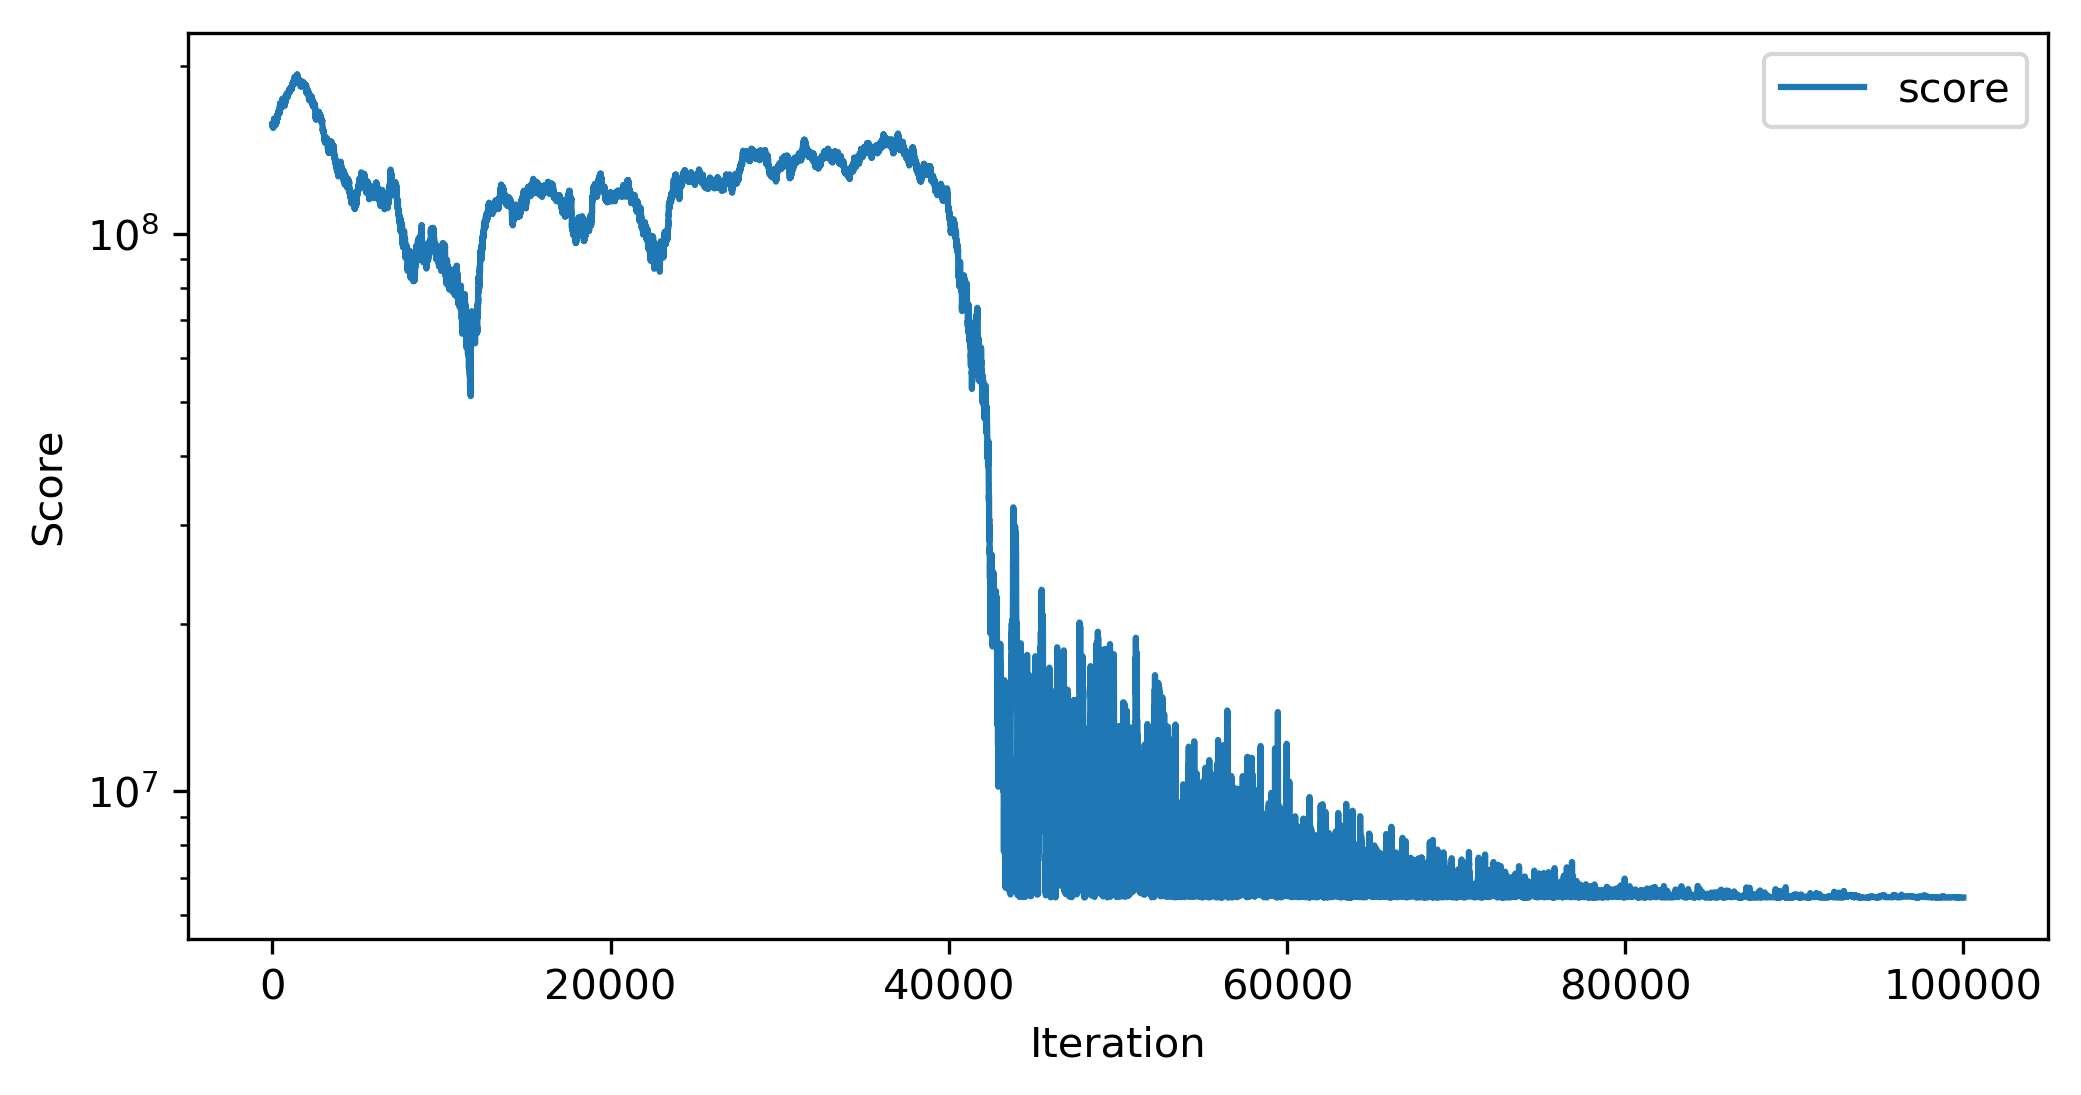

In [7]:
score_list = []
for d in history:
    score_list.append(-d[2])
f = plt.figure(figsize=(8, 4), dpi=300)
f.add_subplot(1, 1, 1)
plt.plot(np.linspace(0, len(history), len(history)), score_list, label='score')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('Score')
plt.legend()
plt.savefig('score.png')
plt.show()

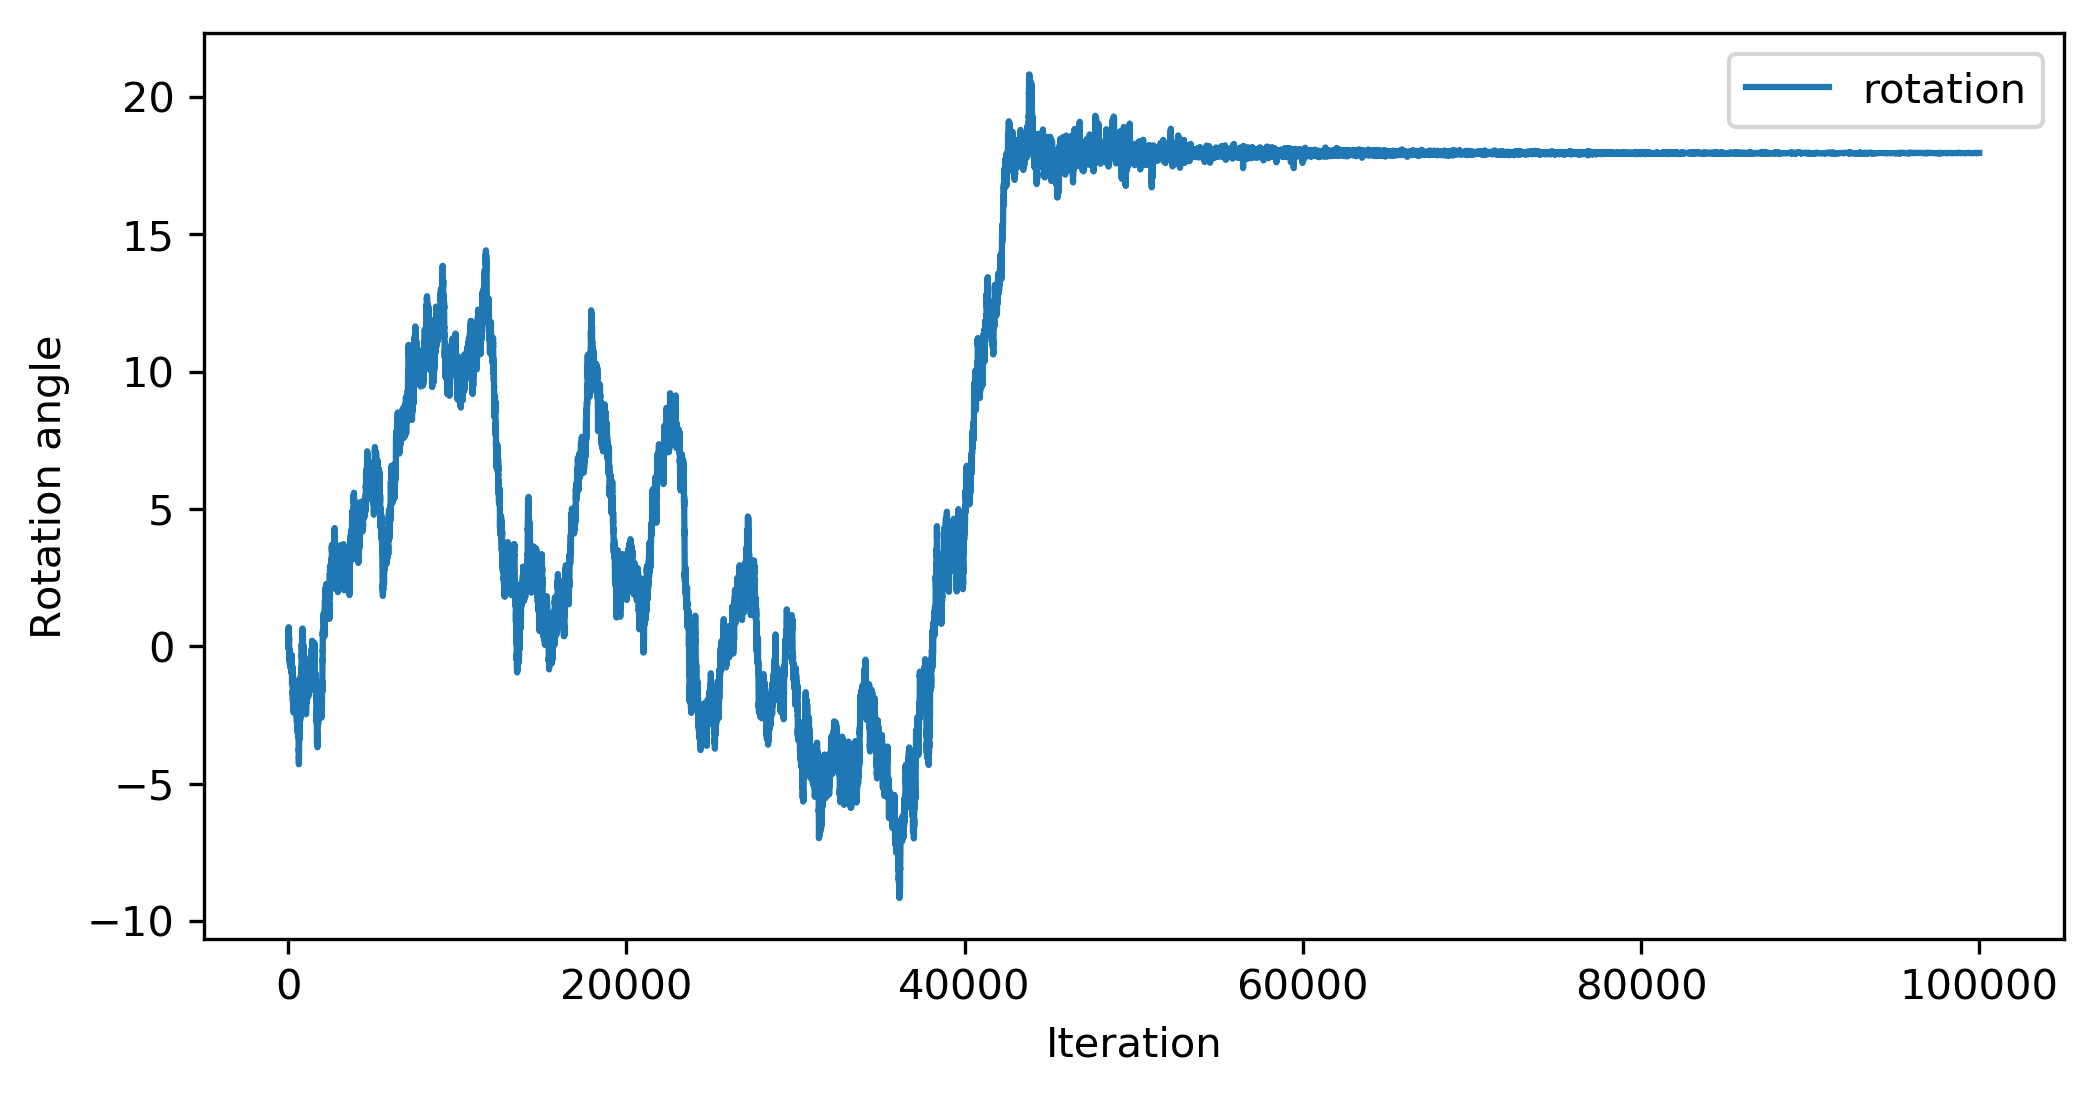

In [8]:
rotation_list = []
for d in history:
    rotation_list.append(d[0])
f = plt.figure(figsize=(8, 4), dpi=300)
f.add_subplot(1, 1, 1)
plt.plot(np.linspace(0, len(history), len(history)), rotation_list, label='rotation')
plt.xlabel('Iteration')
plt.ylabel('Rotation angle')
plt.legend()
plt.savefig('rotation_angle.png')
plt.show()

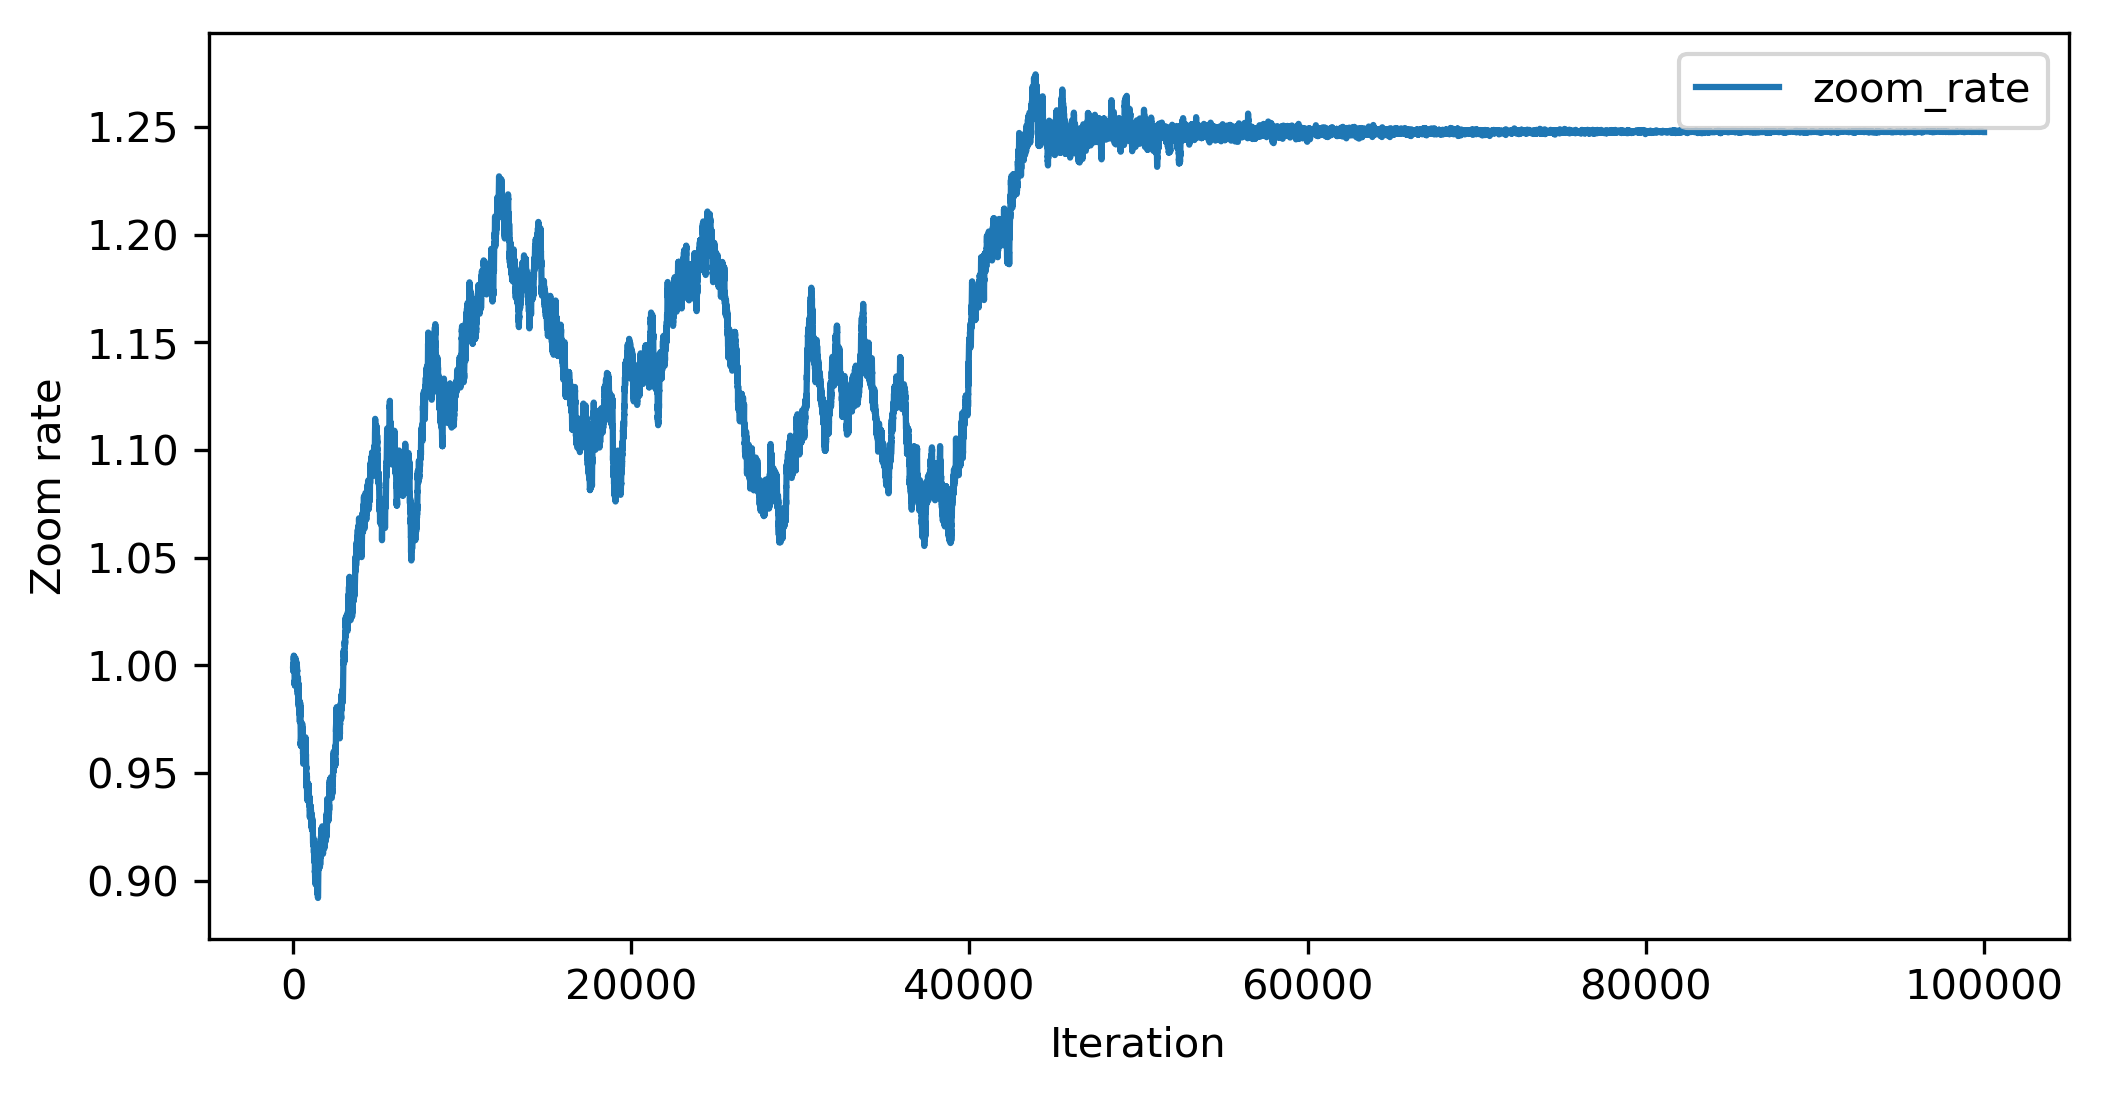

In [9]:
zoom_rate_list = []
for d in history:
    zoom_rate_list.append(d[1])
f = plt.figure(figsize=(8, 4), dpi=300)
f.add_subplot(1, 1, 1)
plt.plot(np.linspace(0, len(history), len(history)), zoom_rate_list, label='zoom_rate')
plt.xlabel('Iteration')
plt.ylabel('Zoom rate')
plt.legend()
plt.savefig('zoom_rate.png')
plt.show()

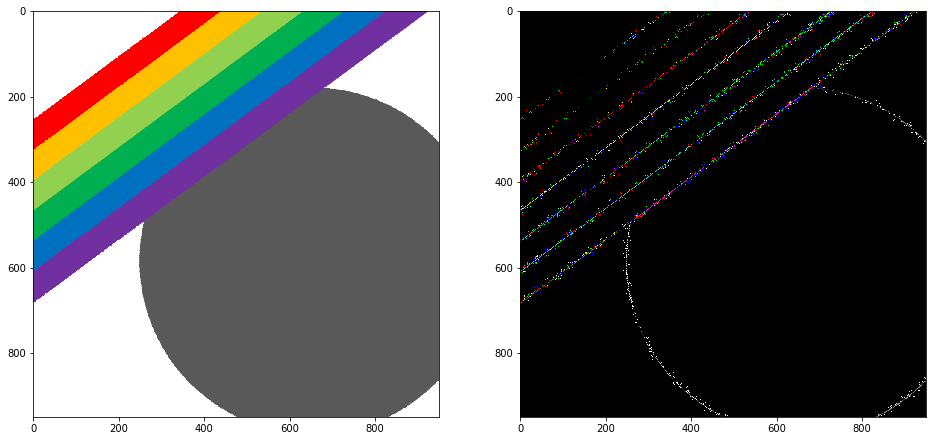

In [10]:
rot_matrix = cv2.getRotationMatrix2D((img_size[0]/2.0, img_size[1]/2.0), rotation_best, zoom_rate_best)
f = plt.figure(figsize=(16, 8))
f.add_subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(cv2.warpAffine(img, rot_matrix, img_size, flags=cv2.INTER_NEAREST, borderValue=(255, 255, 255)), cv2.COLOR_BGR2RGB))
f.add_subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(np.abs(cv2.warpAffine(img, rot_matrix, img_size, flags=cv2.INTER_NEAREST) - target), cv2.COLOR_BGR2RGB))
plt.show()

In [11]:
rot_matrix = cv2.getRotationMatrix2D((img_size[0]/2.0, img_size[1]/2.0), rotation_best, zoom_rate_best)
img_best = cv2.warpAffine(img, rot_matrix, img_size, flags=cv2.INTER_NEAREST, borderValue=(255, 255, 255))
img_difference = np.abs(img_best - target)
cv2.imwrite('img_best.png', img_best)
cv2.imwrite('img_difference.png', img_difference)

True